### 머신러닝 프레임 워크 : scikit-learn
: 다양한 분류기를 지원하며 검증하는 기능, 분류, 회귀, 클러스터링, 차원축소법이 가능하며 샘플 데이터도 제공한다.

In [1]:
# XOR 연산 학습해 보기
xor_input = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]
xor_input

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [2]:
# 학습 전용 데이터와 테스트 전용 데이터로 분류
import pandas as pd

In [3]:
xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.iloc[:,0:2]
xor_label = xor_df.iloc[:,2:]

print(xor_data)
print('-' * 10)
print(xor_label)

   0  1
0  0  0
1  0  1
2  1  0
3  1  1
----------
   2
0  0
1  1
2  1
3  0


In [4]:
# 데이터 학습과 예측하기
from sklearn import svm, metrics

In [5]:
clf = svm.SVC()
clf.fit(xor_data, xor_label)
pred = clf.predict(xor_data)
pred

/Users/jyh/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 0])

In [8]:
# 정답을 구하기
metrics.accuracy_score(xor_label, pred)

1.0

In [9]:
clf = svm.SVC()
clf.fit(xor_data, xor_label)
clf.score(xor_data, xor_label)

/Users/jyh/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

---
### 붓꽃 품종 분류하기

In [10]:
iris = pd.read_csv('../Data/iris.csv')
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [14]:
# 품종을 컬러값으로 구분하기
color_tmp = []
for name in iris['Name']:
    if name == "Iris-setosa":
        color_tmp.append('red')
    elif name == 'Iris-versicolor':
        color_tmp.append('green')
    else:
        color_tmp.append('blue')
iris['Color'] = color_tmp
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red


In [15]:
# Scatter
import matplotlib.pyplot as plt

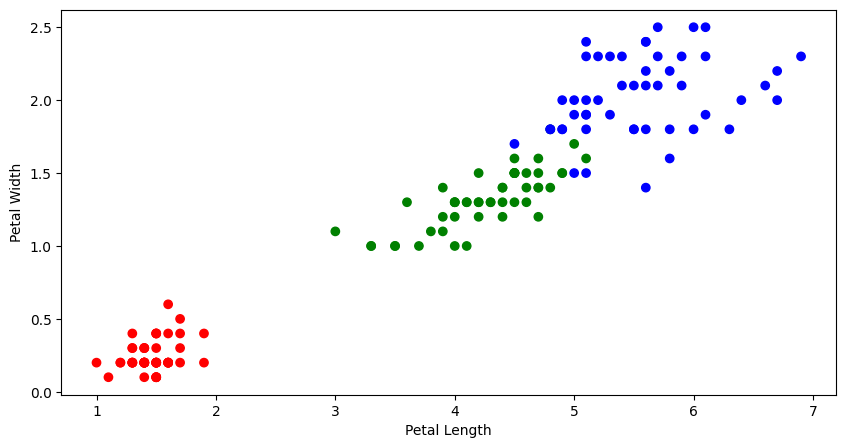

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(
    iris['PetalLength'],
    iris['PetalWidth'],
    c=iris['Color']
)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [ ]:
iris.loc[iris['Name'] == 'Iris-setosa', 'Color'] = 'red'
iris.loc[iris['Name'] == 'Iris-versicolor', 'Color'] = 'green'
iris.loc[iris['Name'] == 'Iris-virginica', 'Color'] = 'blue'

In [17]:
# 머신러닝을 위한 작업
iris_data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris_label = iris['Name']

print(iris_data)
print(iris_label)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object


In [18]:
# 학습용과 테스트용 나누기
from sklearn.model_selection import train_test_split

In [19]:
train_data, test_data, train_label, test_label = train_test_split(iris_data, iris_label)

In [20]:
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [21]:
pred = clf.predict(test_data)
print(pred[0:5])

['Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica']


In [22]:
clf.score(train_data, train_label)

0.9732142857142857

In [23]:
clf.score(test_data, test_label)

1.0

In [24]:
print(metrics.classification_report(test_label, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



### 분류 Report 이해하기
번호 : [1,2,3,4,5,6]        
정답 : [음치, 음치, 음치, 음치, 정상, 정상]     
예측 : [음치, 음치, 정상, 정상, 정상, 정상]     

정확도 : 예측이 맞은 비율?      
4 / 6 = 2 / 3 = 0.66        
정밀도 : 음치라고 예측한 사람들 중에 진짜 음치가 얼마나 있는가?
2 / 2 = 1.0     
재현율 : 전체 음치 중에서 내가 맞춘 음치의 비율?        
원래 음치가 4명 있는데 그중에서 2명을 맞추었다 2 / 4 = 0.5      
F1 Score : 정밀도와 재현율의 평균
2 * 정밀도 * 재현율 / (정밀도 + 재현율) = 0.66

In [25]:
import numpy as np

In [30]:
y = np.array([1,1,1,1,0,0])
p = np.array([1,1,0,0,0,0])

# 정확도
print('정확도 :', np.mean(np.equal(y, p)))

# 정밀도
right = np.sum(y * p == 1)
precision = right / np.sum(p)
print('정밀도 :', precision)

# 재현율
recall = right / np.sum(y)
print('재현율 :', recall)

# f1 score
f1 = 2 * precision * recall / (precision + recall)
print('f1 :', f1)

정확도 : 0.6666666666666666
정밀도 : 1.0
재현율 : 0.5
f1 : 0.6666666666666666


In [33]:
print('accuracy :', metrics.accuracy_score(y,p))
print('precision :', metrics.precision_score(y,p))
print('recall :', metrics.recall_score(y,p))
print('f1 :', metrics.f1_score(y,p))

accuracy : 0.6666666666666666
precision : 1.0
recall : 0.5
f1 : 0.6666666666666666
